# LinDHA Mk. 6 (Elastic Net)

In this notebook, we'll combine the LASSO and Ridge models to see if we can push the errors down a little bit more. LASSO has given us the best model so far but it was still slightly underfitting at the right-tail (expensive homes). Ridge on the other hand was suffering from overfitting. Thus, it is worth trying to average out the two models by taking a linear combination of the $L_1$ and $L_2$ penalty terms. The resulting model is Elastic Net.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet


from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

import joblib

import PaulBettany as jarvis


pd.options.display.max_columns = 100
pd.options.display.max_rows = 2000


seed=1

In [2]:
# The data sets have gotten huge and take a moment to load-in
train = pd.read_csv('../data/train.csv', index_col = 'Id').drop(index=2181)
data = pd.read_csv('../data/ames-poly-engineered.csv', index_col = 'Id')

In [3]:
X = data[:len(train.index) ]
Xkaggle = data[len(train.index) : ]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [4]:
zscale = StandardScaler()

Xs_train = zscale.fit_transform(X_train)
Xs_test = zscale.transform(X_test)
Xs_kaggle = zscale.transform(Xkaggle)


In [5]:
params = { 'alpha' : [22, 24, 26],
            'l1_ratio' : [0.6, 0.65]
         }

In [6]:
lindhamk6 = GridSearchCV( ElasticNet(max_iter = 10_000),
                          params,
                          n_jobs=-1,
                          cv = 3
                        )



In [7]:
################## Mirror Dimension ###################################
#
# lindhamk6.fit(Xs_train, y_train)
#
# joblib.dump(lindhamk6, '../saved-files/lindhamk6.pkl')
#
##################################################################

lindhamk6 = joblib.load('../saved-files/lindhamk6.pkl')

In [8]:
lindhamk6.best_estimator_

ElasticNet(alpha=26, l1_ratio=0.65, max_iter=10000)

In [9]:
jarvis.grade_model(lindhamk6, Xs_train, y_train, display=True), jarvis.grade_model(lindhamk6, Xs_test, y_test, display=True);

 
R2 :0.9688000484097052
MSE: 194155816.77720237
RMSE: 13933.98065081197
MAE: 9305.854730611842
 
 
R2 :0.8995065949747714
MSE: 654823720.501538
RMSE: 25589.523647413564
MAE: 15289.478232338772
 


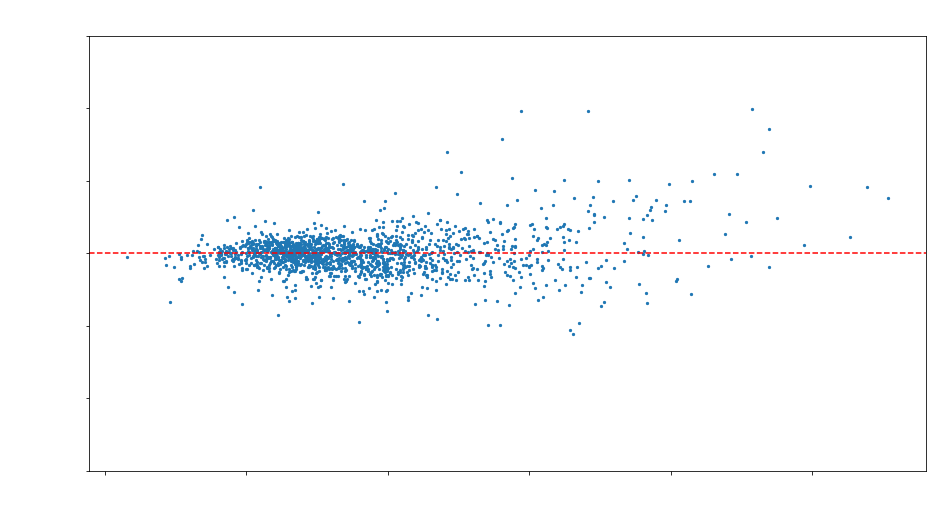

In [10]:
plt.figure(figsize = (15,8));

plt.scatter(x=lindhamk6.predict(Xs_train), y=y_train - lindhamk6.predict(Xs_train), s=5);
plt.axhline(y=0, c='red', linestyle='--');
plt.xticks(c='white');
plt.yticks(c='white');
plt.title('Mk 6 (Train Residuals)', c='white', fontsize=30);
plt.ylim((-150_000, 150_000))
plt.xlabel('Predicted Price', c='white', fontsize=25);
plt.ylabel('Error', c='white', fontsize=25);

plt.savefig('../images/mk6-residuals.png');